In [10]:
from geopy.geocoders import Here
import json

In [11]:
with open('../accounts.json') as json_file:  
    data = json.load(json_file)

In [12]:
app_code = data['accounts']['Here']['app_code']
app_id = data['accounts']['Here']['app_id']
user_agent = data['accounts']['Here']['user_agent']
here = Here(app_code=app_code, app_id=app_id,user_agent=user_agent)

In [13]:
location = here.geocode('Carrer de Valencia 156')

In [6]:
import telluric as tl
from telluric.constants import WGS84_CRS, WEB_MERCATOR_CRS

In [7]:
coordinates = _.to_record(WGS84_CRS)

AttributeError: 'list' object has no attribute 'to_record'

In [14]:
a = here.reverse(location.point)



In [19]:
a.raw['Location']['Address']['District']

"l'Antiga Esquerra de l'Eixample"

In [8]:
gv1.to_record(WGS84_CRS)

NameError: name 'gv1' is not defined

In [255]:
a = []

In [226]:
coordinates = _.to_record(WGS84_CRS)

In [17]:
g=tl.GeoVector.point(location.point.longitude, location.point.latitude, crs=WGS84_CRS).reproject(WEB_MERCATOR_CRS).buffer(500)

/Users/seba/anaconda3/lib/python3.6/site-packages/telluric/plotting.py:171: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


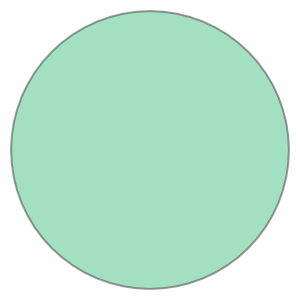

In [18]:
g

In [10]:

def get_cirlce_location(location, distance):
    return (tl.GeoVector.point(location.longitude, location.latitude)
            .reproject(WEB_MERCATOR_CRS)
            .buffer(distance)
            .to_record(WGS84_CRS)['coordinates'][0]
        )

def get_circles_locations(location, distance=1000):
    outer_circle = distance + 400
    coordinates = []
    while distance > 0:
        coordinates.append(get_cirlce_location(location, distance))
        distance -= 350
    coordinates.append(get_cirlce_location(location, outer_circle))
    return coordinates
    
        

In [321]:
coordinates = get_circles_locations(location.point,2000)

In [322]:
circle_coordinates = []

In [323]:
for coordinate in coordinates:
    for i in range(8,65,8):
        coord = coordinate[i]
        circle_coordinates.append([coord[::-1][0],coord[::-1][1]])

In [324]:
len(circle_coordinates)

56

In [300]:
coordenadas[1]

['41.38929754601201', '2.190800296580879']

In [295]:
coordenadas = [['lat_dms','lon_dms']]

In [329]:
coordenadas.insert(0,[location.point.latitude,location.point.longitude])
coordenadas.insert(0,['lat_dms','lon_dms'])

In [330]:
import csv
# coordenadas = circle_coordinates
# coordenadas.append
with open("output.csv", "w") as f:
    writer = csv.writer(f)
    for coord in coordenadas:
        writer.writerow(coord)

In [305]:
from geopy.geocoders import Nominatim
import time
from collections import Counter
geolocator = Nominatim(user_agent="get_setlled")


In [308]:
address = []
for coord in circle_coordinates:
    address.append(geolocator.reverse(coord))
    time.sleep(3)

In [314]:
neighborhouds = []
for suburb in address:
    neighborhouds.append(suburb.raw['address']['suburb'])

In [316]:
from collections import Counter

In [347]:
Counter(neighborhouds).most_common(15)

[("la Dreta de l'Eixample", 14),
 ("el Camp d'en Grassot i Gràcia Nova", 6),
 ('el Fort Pienc', 6),
 ('la Sagrada Família', 5),
 ('el Clot', 4),
 ('Sant Pere, Santa Caterina i la Ribera', 4),
 ('la Vila Olímpica del Poblenou', 3),
 ('el Parc i la Llacuna del Poblenou', 3),
 ('el Gòtic', 2),
 ('la Vila de Gràcia', 2),
 ('el Poblenou', 2),
 ('Navas', 2),
 ('el Baix Guinardó', 1),
 ("el Camp de l'Arpa del Clot", 1),
 ("la Nova Esquerra de l'Eixample", 1)]

In [318]:
location

Location(Sheyma, Carrer de la Diputació, la Dreta de l'Eixample, Eixample, Barcelona, BCN, CAT, 08007, España, (41.3988279, 2.1780962, 0.0))

In [27]:
locations = here.reverse(location.point)

In [15]:
locations

[Location(Carrer de València, 156, 08011 Barcelona (Barcelona), Espanya, Barcelona, Catalunya 08011, ESP, (41.38628, 2.15476, 0.0)),
 Location(Carrer de València, 158, 08011 Barcelona (Barcelona), Espanya, Barcelona, Catalunya 08011, ESP, (41.3864501, 2.1549867, 0.0)),
 Location(Carrer de Villarroel, 127, 08011 Barcelona (Barcelona), Espanya, Barcelona, Catalunya 08011, ESP, (41.38638, 2.15526, 0.0)),
 Location(Carrer de Villarroel, 125, 08011 Barcelona (Barcelona), Espanya, Barcelona, Catalunya 08011, ESP, (41.3863, 2.15536, 0.0)),
 Location(Carrer de Villarroel, 129, 08036 Barcelona (Barcelona), Espanya, Barcelona, Catalunya 08036, ESP, (41.38663, 2.15493, 0.0)),
 Location(Carrer de València, 146, 08011 Barcelona (Barcelona), Espanya, Barcelona, Catalunya 08011, ESP, (41.38605, 2.15447, 0.0)),
 Location(Avinguda de Roma, 125, 08011 Barcelona (Barcelona), Espanya, Barcelona, Catalunya 08011, ESP, (41.38583, 2.15514, 0.0)),
 Location(Carrer de Villarroel, 131, 08036 Barcelona (Barcelon

In [17]:
locations[2].raw

{'Relevance': 1.0,
 'Distance': 21.9,
 'MatchLevel': 'houseNumber',
 'MatchQuality': {'Country': 1.0,
  'State': 1.0,
  'County': 1.0,
  'City': 1.0,
  'District': 1.0,
  'Street': [1.0],
  'HouseNumber': 1.0,
  'PostalCode': 1.0},
 'MatchType': 'interpolated',
 'Location': {'LocationId': 'NT_KqsTsC62SU9vfG63m1tNaD_xIzN',
  'LocationType': 'point',
  'DisplayPosition': {'Latitude': 41.38638, 'Longitude': 2.15526},
  'MapView': {'TopLeft': {'Latitude': 41.3875042, 'Longitude': 2.1537617},
   'BottomRight': {'Latitude': 41.3852558, 'Longitude': 2.1567583}},
  'Address': {'Label': 'Carrer de Villarroel, 127, 08011 Barcelona (Barcelona), Espanya',
   'Country': 'ESP',
   'State': 'Catalunya',
   'County': 'Barcelona',
   'City': 'Barcelona',
   'District': "l'Antiga Esquerra de l'Eixample",
   'Street': 'Carrer de Villarroel',
   'HouseNumber': '127',
   'PostalCode': '08011',
   'AdditionalData': [{'value': 'Espanya', 'key': 'CountryName'},
    {'value': 'Catalunya', 'key': 'StateName'},


In [29]:
barrios = set()
for barrio in locations:
    barrios.add(barrio.raw['Location']['Address']['District'])


In [30]:
barrios

{"La Nova Esquerra de l'Eixample", "l'Antiga Esquerra de l'Eixample"}

In [94]:
chicos_place = here.geocode('Universitat 14, Barcelona')

In [95]:
chicos_place.raw

{'Relevance': 1.0,
 'MatchLevel': 'houseNumber',
 'MatchQuality': {'City': 1.0, 'Street': [0.9], 'HouseNumber': 1.0},
 'MatchType': 'pointAddress',
 'Location': {'LocationId': 'NT_CqK9A7WbaytSUW7RPD.B9C_xQD',
  'LocationType': 'point',
  'DisplayPosition': {'Latitude': 41.38666, 'Longitude': 2.16702},
  'NavigationPosition': [{'Latitude': 41.3868, 'Longitude': 2.16692}],
  'MapView': {'TopLeft': {'Latitude': 41.3877842, 'Longitude': 2.1655217},
   'BottomRight': {'Latitude': 41.3855358, 'Longitude': 2.1685183}},
  'Address': {'Label': 'Ronda de la Universitat, 14, 08007 Barcelona (Barcelona), Espanya',
   'Country': 'ESP',
   'State': 'Catalunya',
   'County': 'Barcelona',
   'City': 'Barcelona',
   'District': "Dreta de l'Eixample",
   'Street': 'Ronda de la Universitat',
   'HouseNumber': '14',
   'PostalCode': '08007',
   'AdditionalData': [{'value': 'Espanya', 'key': 'CountryName'},
    {'value': 'Catalunya', 'key': 'StateName'},
    {'value': 'Barcelona', 'key': 'CountyName'}]}}}

In [1]:
from Geofinder import Geofinder

In [2]:
geofinder = Geofinder()

In [3]:
geofinder.create()

In [7]:
geofinder.get_neighborhoods('Frances Macia Diagonal', 1800)

[('Vila de Gràcia', 17),
 ("Dreta de l'Eixample", 12),
 ("l'Antiga Esquerra de l'Eixample", 8),
 ('Sant Gervasi-Galvany', 6),
 ("La Nova Esquerra de l'Eixample", 4),
 ('El Putget i Farró', 4),
 ("Camp d'en Grassot i Gràcia Nova", 2),
 ('El Gòtic', 1),
 ('La Salut', 1),
 ('Sagrada Familia', 1),
 ('Fort Pienc', 1)]